### **Machine Learning Final Project**

1.   **521H0385 - Trần Quốc An**
2.   **521H0413 - Lê Trần Nhật Quang**
3.   **521H0327 - Nguyễn Thanh Tuấn**



In [222]:
import numpy as np
import pandas as pd

In [223]:
#read file
data = pd.read_csv('stroke_prediction.csv')

In [224]:
print('Shape of Stroke Prediction DataFrame: ', data.shape)

Shape of Stroke Prediction DataFrame:  (5212, 12)


In [225]:
#Drop no used feature
data.drop(columns= ['id'], inplace= True)

In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5212 entries, 0 to 5211
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5212 non-null   object 
 1   age                5212 non-null   float64
 2   hypertension       5212 non-null   int64  
 3   heart_disease      5212 non-null   int64  
 4   ever_married       5212 non-null   object 
 5   work_type          5212 non-null   object 
 6   Residence_type     5212 non-null   object 
 7   avg_glucose_level  5212 non-null   float64
 8   bmi                5007 non-null   float64
 9   smoking_status     5212 non-null   object 
 10  stroke             5212 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 448.0+ KB


In [227]:
print(data.isnull().sum())
print(data.duplicated().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  205
smoking_status         0
stroke                 0
dtype: int64
102


In [228]:
#handling missing and duplicate values
data['bmi'] = data['bmi'].fillna(data["bmi"].median())
data.drop_duplicates(inplace= True)

In [229]:
print(data.isnull().sum())
print(data.duplicated().sum())


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
0


In [230]:
#Split categorical and numerical feature
column_names = data.columns
cats = []
nums = []
for i in column_names:
     if data[i].dtypes == 'object':
          cats.append(i)
     else:
          nums.append(i)
print(cats)
print(nums)


['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


In [231]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.858102,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.699976,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.000000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### **Exploratory Data Analysis (EDA)**

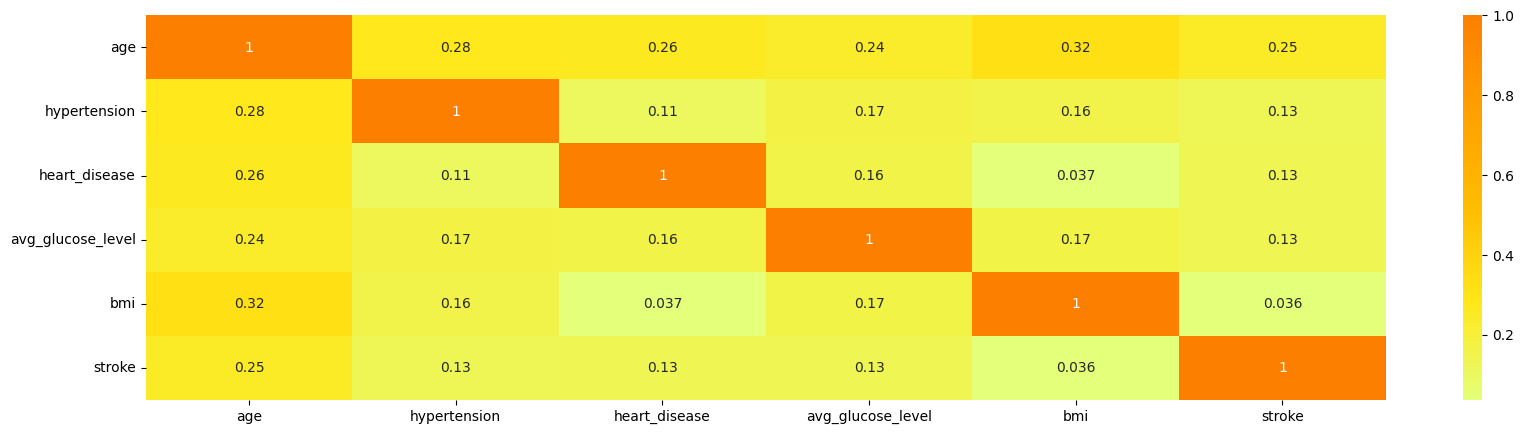

In [232]:
import seaborn as sb
import matplotlib.pyplot as plt

#Correlation between features and target values

plt.figure(figsize= (20, 5))
sb.heatmap(data[nums].corr(), annot= True, cmap= 'Wistia')
plt.show()

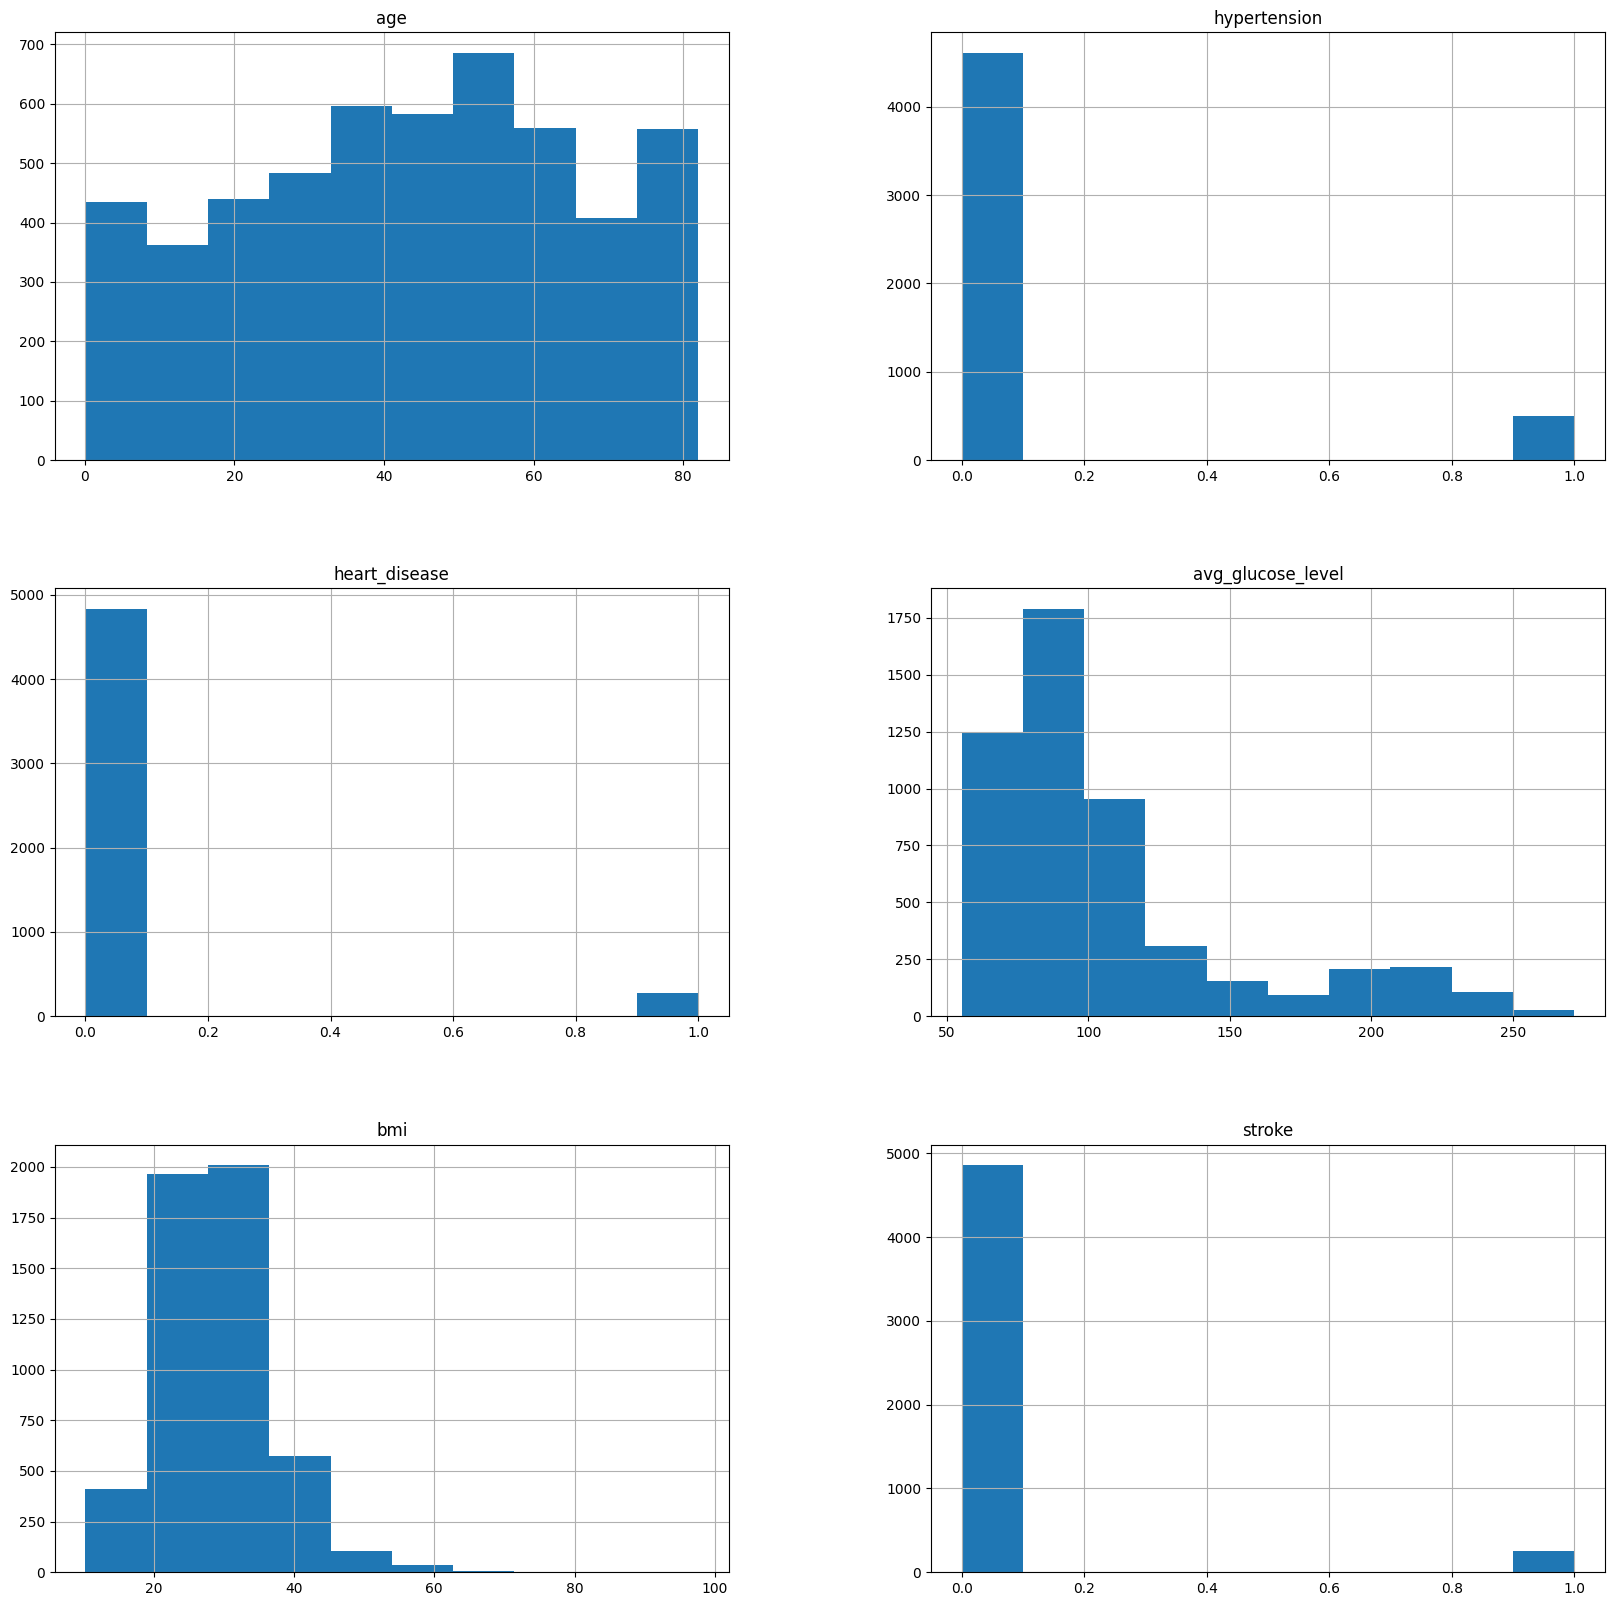

In [233]:

data.hist(figsize= (20, 20))
plt.show()

### **Value Distribution of each feature**

In [234]:
def pieplot(df, column):
    label = df[column].unique().tolist()
    data = df[column].value_counts()
    plt.figure(figsize = (5, 5))
    plt.pie(data, labels = label, autopct = "%.0f%%")
    plt.title(column)
    plt.show()

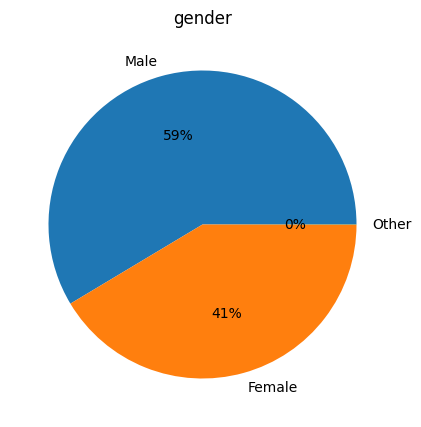

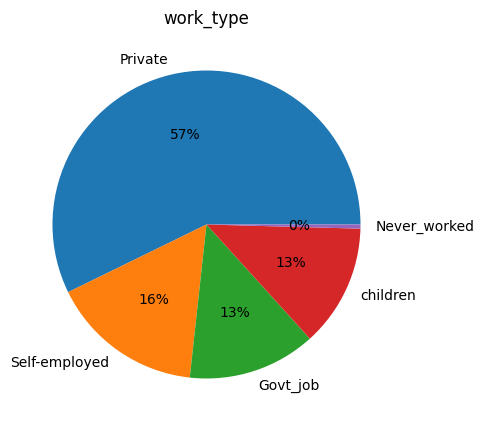

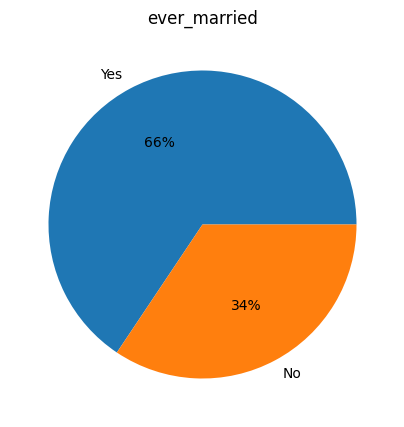

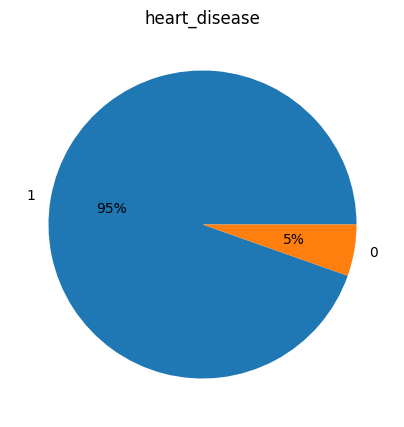

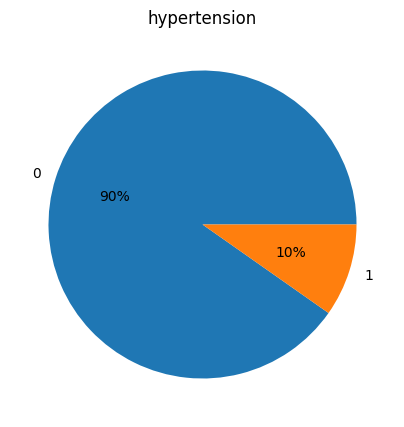

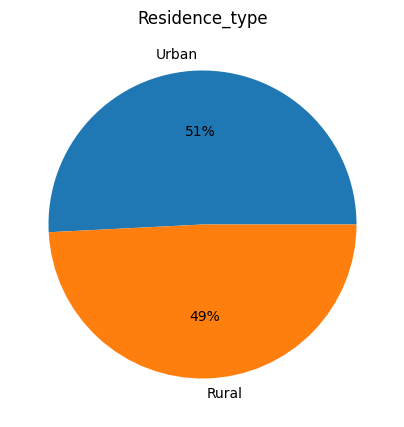

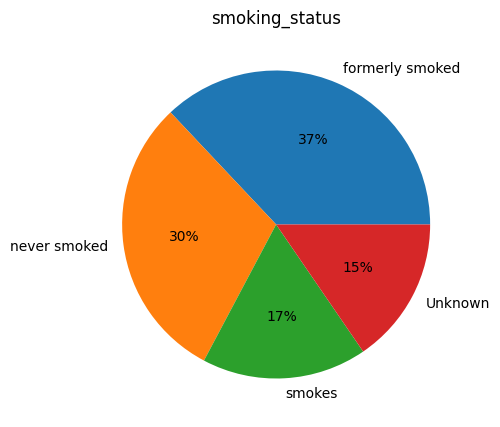

In [235]:
lists_of_plots = ["gender", "work_type", "ever_married","heart_disease", "hypertension", "Residence_type", "smoking_status", ]
for i in range(len(lists_of_plots)):
    pieplot(data, lists_of_plots[i])

### **Correlation between value of each feature and stroke**

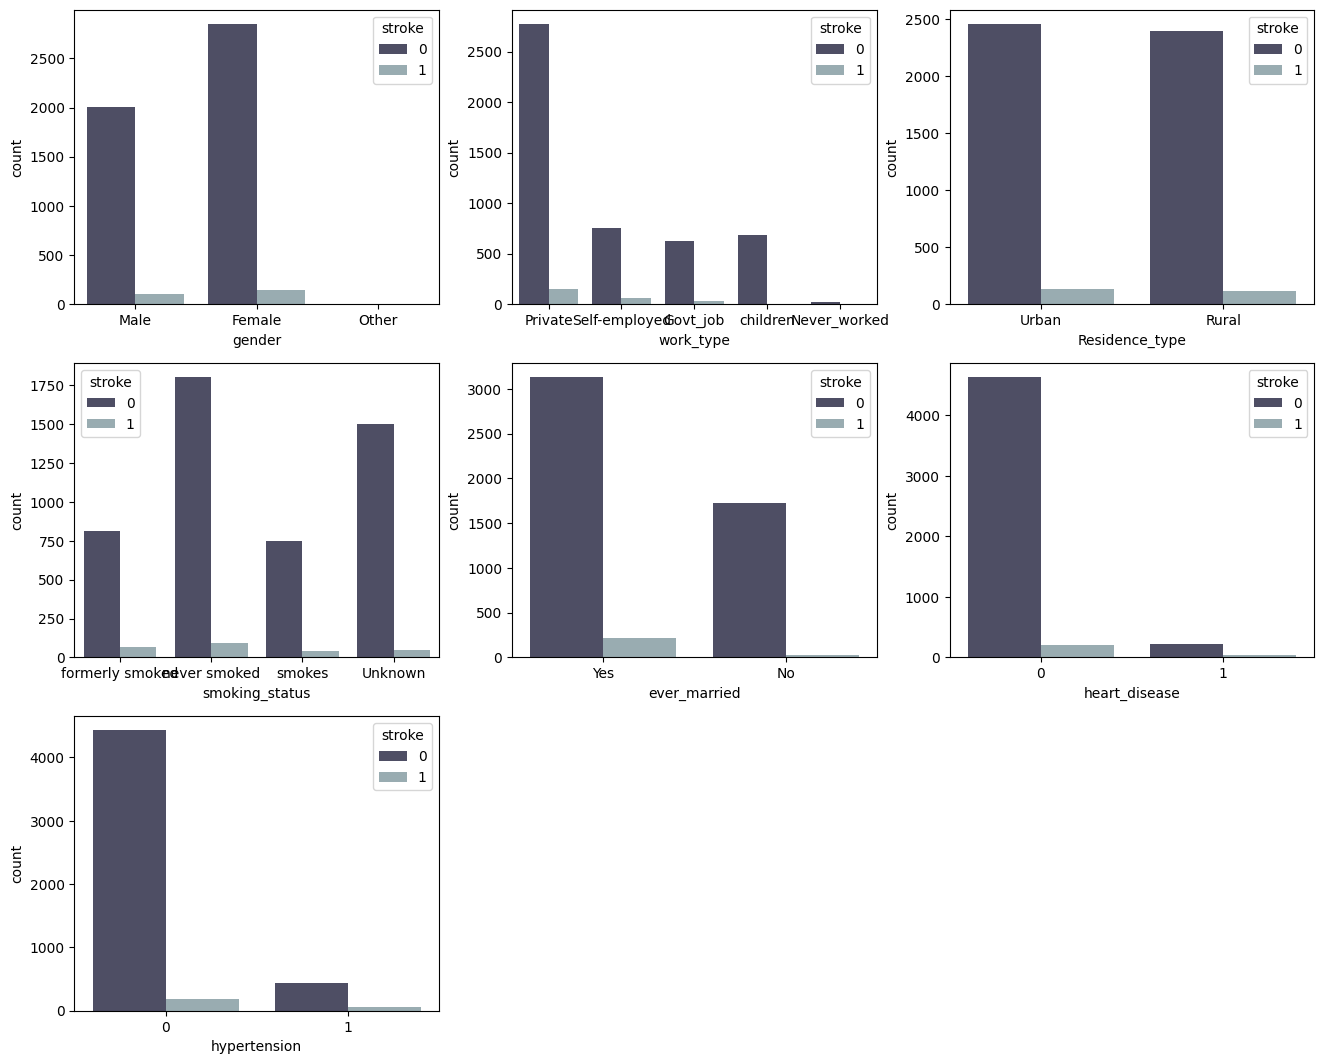

In [236]:
cols = ['gender','work_type','Residence_type','smoking_status','ever_married','heart_disease','hypertension']
plt.figure(figsize=(16,13))
for i in range(len(cols)):
    plt.subplot(3,3,i+1)

    sb.countplot(x=data[cols[i]],hue = data['stroke'],palette = 'bone')

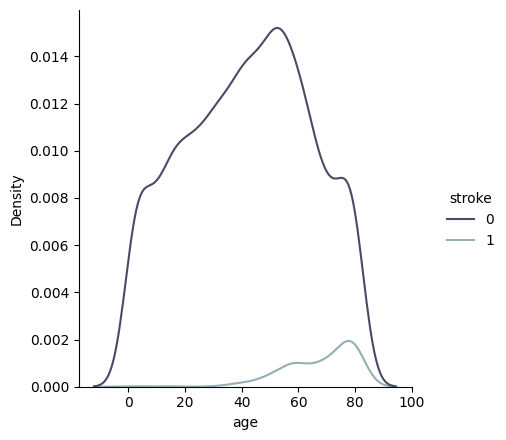

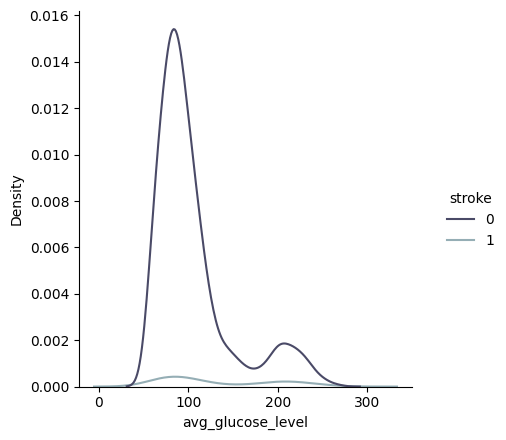

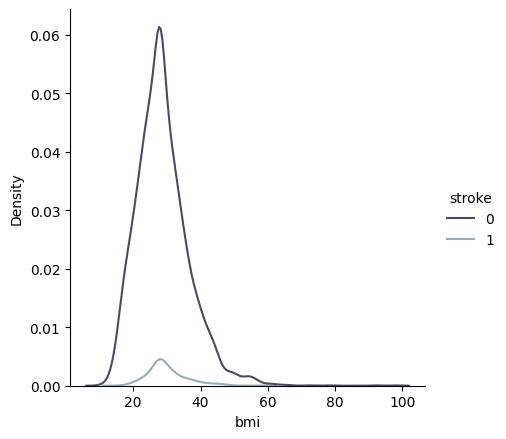

In [237]:
for i in ['age', 'avg_glucose_level', 'bmi']:
     sb.displot(data = data , x=i,hue = 'stroke',kind = 'kde',palette = 'bone',height=4.5 )
     plt.show()

### **Import Library**

In [238]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn .ensemble import RandomForestClassifier
from sklearn .ensemble import VotingClassifier , BaggingClassifier , StackingClassifier

### **Preprocessing**

In [239]:
#Encoder the categorical features
le = LabelEncoder()
for i in cats:
     if data[i].dtypes == 'object':
          data[i] = le.fit_transform(data[i])
print(data.dtypes)

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object


In [240]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 608.1 KB


In [241]:
#Split feature and target
X = data.drop('stroke', axis= 1)
y = data['stroke']

In [242]:
#Data scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [243]:
#Split train and test set
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = .20)

### **Rebalance data**

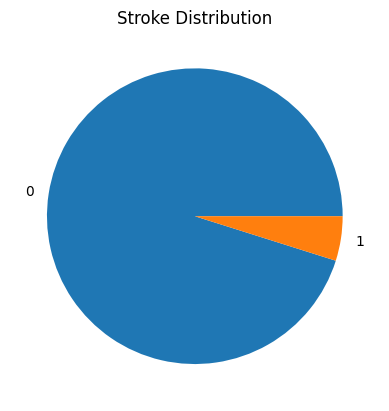

In [244]:
stroke_distribution = y_train.value_counts()
plt.plot(figsize=(10, 6))
plt.pie(stroke_distribution, labels= stroke_distribution.index)
plt.title("Stroke Distribution")
plt.show()

In [245]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

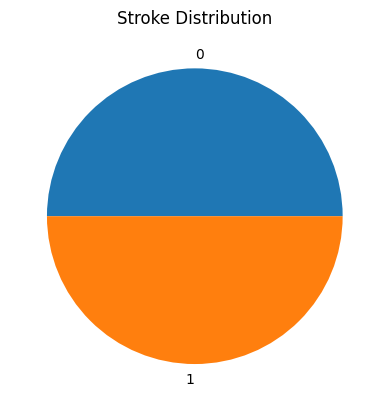

In [246]:
stroke_distribution = y_train.value_counts()
plt.plot(figsize=(10, 6))
plt.pie(stroke_distribution, labels= stroke_distribution.index)
plt.title("Stroke Distribution")
plt.show()

In [247]:
print(y_test.value_counts())

0    972
1     50
Name: stroke, dtype: int64


### **Build Ensemble Learning Model**

### **KNN**

In [248]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8062622309197651

Confusion Matrix:
 [[801 171]
 [ 27  23]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.82      0.89       972
           1       0.12      0.46      0.19        50

    accuracy                           0.81      1022
   macro avg       0.54      0.64      0.54      1022
weighted avg       0.93      0.81      0.86      1022



In [249]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_knn_model = KNeighborsClassifier(**best_params)
best_knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_knn_model.predict(X_test)


In [250]:
# Print the evaluation metrics
print("Best Parameters:", best_params)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Accuracy: 0.863013698630137

Confusion Matrix:
 [[868 104]
 [ 36  14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.93       972
           1       0.12      0.28      0.17        50

    accuracy                           0.86      1022
   macro avg       0.54      0.59      0.55      1022
weighted avg       0.92      0.86      0.89      1022



In [251]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(best_knn_model, X_train, y_train, cv=cv, scoring='accuracy')

y_train_pred = best_knn_model.predict(X_train)
print("Train scores",accuracy_score(y_train_pred, y_train))

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Train scores 1.0
Cross-Validation Scores: [0.93637532 0.92930591 0.93251928 0.92926045 0.94469453]
Mean Accuracy: 0.9344310996123294


### **Logistic**

In [252]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

y_pred = logistic.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7534246575342466

Confusion Matrix:
 [[734 238]
 [ 14  36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.76      0.85       972
           1       0.13      0.72      0.22        50

    accuracy                           0.75      1022
   macro avg       0.56      0.74      0.54      1022
weighted avg       0.94      0.75      0.82      1022



In [253]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2']}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(logistic, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_logistic_model = LogisticRegression(**best_params)
best_logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_logistic_model.predict(X_test)


In [254]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Best Parameters: {'C': 1, 'penalty': 'l2'}
Accuracy: 0.7534246575342466

Confusion Matrix:
 [[734 238]
 [ 14  36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.76      0.85       972
           1       0.13      0.72      0.22        50

    accuracy                           0.75      1022
   macro avg       0.56      0.74      0.54      1022
weighted avg       0.94      0.75      0.82      1022



In [255]:

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(best_logistic_model, X_train, y_train, cv=cv, scoring='accuracy')

y_train_pred = best_logistic_model.predict(X_train)
print("Train scores",accuracy_score(y_train_pred, y_train))

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Train scores 0.7939058884031884
Cross-Validation Scores: [0.80077121 0.78791774 0.78856041 0.80257235 0.78778135]
Mean Accuracy: 0.7935206110151348


### **Decision Tree**

In [256]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion Matrix: 
[[887  85]
 [ 42   8]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       972
           1       0.09      0.16      0.11        50

    accuracy                           0.88      1022
   macro avg       0.52      0.54      0.52      1022
weighted avg       0.91      0.88      0.89      1022



In [257]:

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_decision_tree_model = DecisionTreeClassifier(**best_params, random_state=42)
best_decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_decision_tree_model.predict(X_test)

In [258]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.8816046966731899

Confusion Matrix:
 [[892  80]
 [ 41   9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       972
           1       0.10      0.18      0.13        50

    accuracy                           0.88      1022
   macro avg       0.53      0.55      0.53      1022
weighted avg       0.91      0.88      0.90      1022



In [259]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(dt, X_train, y_train, cv=cv, scoring='accuracy')

y_train_pred = dt.predict(X_train)
print("Train scores",accuracy_score(y_train_pred, y_train))

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Train scores 1.0
Cross-Validation Scores: [0.9222365  0.91966581 0.91838046 0.92990354 0.93954984]
Mean Accuracy: 0.9259472305110805


### **Naive Bayes**

In [260]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion Matrix: 
[[712 260]
 [ 15  35]]
              precision    recall  f1-score   support

           0       0.98      0.73      0.84       972
           1       0.12      0.70      0.20        50

    accuracy                           0.73      1022
   macro avg       0.55      0.72      0.52      1022
weighted avg       0.94      0.73      0.81      1022



In [261]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_gnb_model = GaussianNB(**best_params)
best_gnb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_gnb_model.predict(X_test)

In [262]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Best Parameters: {'var_smoothing': 0.01}
Accuracy: 0.726027397260274

Confusion Matrix:
 [[707 265]
 [ 15  35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.73      0.83       972
           1       0.12      0.70      0.20        50

    accuracy                           0.73      1022
   macro avg       0.55      0.71      0.52      1022
weighted avg       0.94      0.73      0.80      1022



In [263]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(nb, X_train, y_train, cv=cv, scoring='accuracy')

y_train_pred = nb.predict(X_train)
print(accuracy_score(y_train_pred, y_train))

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

0.7833633324762149
Cross-Validation Scores: [0.78856041 0.78277635 0.78920308 0.78778135 0.75819936]
Mean Accuracy: 0.7813041106307705


### **Support Vector Machine**

In [264]:
svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion Matrix: 
[[754 218]
 [ 21  29]]
              precision    recall  f1-score   support

           0       0.97      0.78      0.86       972
           1       0.12      0.58      0.20        50

    accuracy                           0.77      1022
   macro avg       0.55      0.68      0.53      1022
weighted avg       0.93      0.77      0.83      1022



In [265]:
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto', 0.1, 0.01], 'kernel': ['rbf', 'linear']}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_svm_model = SVC(**best_params, random_state=42)
best_svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tuned = best_svm_model.predict(X_test)

In [266]:
# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
classification_rep_tuned = classification_report(y_test, y_pred_tuned)

print("\nTuned Model Evaluation:")
print("Best Parameters:", best_params)
print("Accuracy:", accuracy_tuned)
print("\nConfusion Matrix:\n", conf_matrix_tuned)
print("\nClassification Report:\n", classification_rep_tuned)


Tuned Model Evaluation:
Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy: 0.8062622309197651

Confusion Matrix:
 [[808 164]
 [ 34  16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.83      0.89       972
           1       0.09      0.32      0.14        50

    accuracy                           0.81      1022
   macro avg       0.52      0.58      0.51      1022
weighted avg       0.92      0.81      0.85      1022



In [267]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(svc, X_train, y_train, cv=cv, scoring='accuracy')

y_train_pred = svc.predict(X_train)
print(accuracy_score(y_train_pred, y_train))

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

0.8643610182566213
Cross-Validation Scores: [0.86825193 0.85025707 0.8496144  0.85209003 0.84308682]
Mean Accuracy: 0.8526600484381586


### **Voting**

In [268]:
models = [('SVM', best_svm_model), ('Decision Tree', best_decision_tree_model), ('Logistic', best_logistic_model), ('KNN', best_knn_model), ('GaussianNB', best_gnb_model)]

voting = VotingClassifier(
    estimators = models,
    voting= 'hard'
)

voting.fit(X_train, y_train)

VotingClassifier(estimators=[('SVM', SVC(C=10, gamma='auto', random_state=42)),
                             ('Decision Tree',
                              DecisionTreeClassifier(random_state=42)),
                             ('Logistic', LogisticRegression(C=1)),
                             ('KNN',
                              KNeighborsClassifier(n_neighbors=3, p=1,
                                                   weights='distance')),
                             ('GaussianNB', GaussianNB(var_smoothing=0.01))])

In [269]:
y_pred_voting = voting.predict(X_test)

print("Stacking Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_voting))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_voting))
print("\nClassification Report:\n", classification_report(y_test, y_pred_voting))

Stacking Classifier Evaluation:
Accuracy: 0.8209393346379648

Confusion Matrix:
 [[819 153]
 [ 30  20]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.84      0.90       972
           1       0.12      0.40      0.18        50

    accuracy                           0.82      1022
   macro avg       0.54      0.62      0.54      1022
weighted avg       0.92      0.82      0.86      1022



### **Bagging**

In [270]:
base_model = best_decision_tree_model
bagging_classifier = BaggingClassifier(base_model, n_estimators= 50, random_state = 42)

bagging_classifier.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=50, random_state=42)

In [271]:
y_pred_bagging = bagging_classifier.predict(X_test)

print("Stacking Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_bagging))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bagging))

Stacking Classifier Evaluation:
Accuracy: 0.9158512720156555

Confusion Matrix:
 [[929  43]
 [ 43   7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       972
           1       0.14      0.14      0.14        50

    accuracy                           0.92      1022
   macro avg       0.55      0.55      0.55      1022
weighted avg       0.92      0.92      0.92      1022



### **Stacking**

In [272]:
base_models = [('SVM',best_svm_model),('Decision Tree',best_decision_tree_model),('Logistic Regerssion',best_logistic_model) , ('KNN',best_knn_model), ('GaussianNB', best_gnb_model)]
stacking = StackingClassifier(
    estimators = base_models ,
    final_estimator = LogisticRegression(),
    cv = 5
)

stacking.fit(X_train , y_train)


StackingClassifier(cv=5,
                   estimators=[('SVM',
                                SVC(C=10, gamma='auto', random_state=42)),
                               ('Decision Tree',
                                DecisionTreeClassifier(random_state=42)),
                               ('Logistic Regerssion', LogisticRegression(C=1)),
                               ('KNN',
                                KNeighborsClassifier(n_neighbors=3, p=1,
                                                     weights='distance')),
                               ('GaussianNB', GaussianNB(var_smoothing=0.01))],
                   final_estimator=LogisticRegression())

In [273]:
y_pred_stacking = stacking.predict(X_test)
print("Stacking Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_stacking))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_stacking))
print("\nClassification Report:\n", classification_report(y_test, y_pred_stacking))

Stacking Classifier Evaluation:
Accuracy: 0.9060665362035225

Confusion Matrix:
 [[918  54]
 [ 42   8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       972
           1       0.13      0.16      0.14        50

    accuracy                           0.91      1022
   macro avg       0.54      0.55      0.55      1022
weighted avg       0.92      0.91      0.91      1022



### **Neural Network Model**

In [274]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout, BatchNormalization, Flatten
from keras.callbacks import EarlyStopping
from keras import regularizers

In [275]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7778, 10) (7778,)
(1022, 10) (1022,)


### Before using Dropout and Early Stopping

In [325]:
# Build a neural network model with Dropout and BatchNormalization
model_simple = Sequential()
#input layer
model_simple.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

#hideen layers
model_simple.add(Dense(64, activation='relu'))
model_simple.add(Dense(64, activation='relu'))
model_simple.add(Dense(32, activation='relu'))
model_simple.add(Dense(16, activation='relu'))

#output layer
model_simple.add(Dense(1, activation='sigmoid'))

In [326]:
model_simple.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_simple.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_95 (Dense)            (None, 128)               1408      
                                                                 
 dense_96 (Dense)            (None, 64)                8256      
                                                                 
 dense_97 (Dense)            (None, 64)                4160      
                                                                 
 dense_98 (Dense)            (None, 32)                2080      
                                                                 
 dense_99 (Dense)            (None, 16)                528       
                                                                 
 dense_100 (Dense)           (None, 1)                 17        
                                                                 
Total params: 16449 (64.25 KB)
Trainable params: 1644

In [327]:
history= model_simple.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
244/244 [==============================] - 3s 4ms/step - loss: 0.4445 - accuracy: 0.7956 - val_loss: 0.4624 - val_accuracy: 0.7417
Epoch 2/30
244/244 [==============================] - 1s 3ms/step - loss: 0.3696 - accuracy: 0.8349 - val_loss: 0.4173 - val_accuracy: 0.7857
Epoch 3/30
244/244 [==============================] - 1s 3ms/step - loss: 0.3235 - accuracy: 0.8638 - val_loss: 0.4277 - val_accuracy: 0.7759
Epoch 4/30
244/244 [==============================] - 1s 3ms/step - loss: 0.2958 - accuracy: 0.8770 - val_loss: 0.3855 - val_accuracy: 0.8200
Epoch 5/30
244/244 [==============================] - 1s 3ms/step - loss: 0.2629 - accuracy: 0.8953 - val_loss: 0.4183 - val_accuracy: 0.8190
Epoch 6/30
244/244 [==============================] - 1s 4ms/step - loss: 0.2324 - accuracy: 0.9085 - val_loss: 0.4651 - val_accuracy: 0.8180
Epoch 7/30
244/244 [==============================] - 1s 4ms/step - loss: 0.2180 - accuracy: 0.9151 - val_loss: 0.4045 - val_accuracy: 0.8571
Epoch 

In [328]:
test_loss, test_acc = model_simple.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')
print(f'Test LOss: {test_loss}')

32/32 [==============================] - 0s 2ms/step - loss: 0.7731 - accuracy: 0.8806
Test Accuracy: 0.8806262016296387
Test LOss: 0.7731110453605652


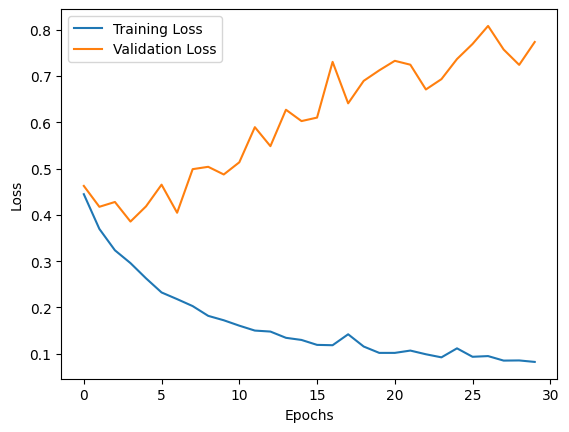

In [329]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [334]:
y_pred = (model_simple.predict(X_test) > 0.5).astype(int).flatten()
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[896  76]
 [ 46   4]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       972
           1       0.05      0.08      0.06        50

    accuracy                           0.88      1022
   macro avg       0.50      0.50      0.50      1022
weighted avg       0.91      0.88      0.89      1022



### After Using Dropout, Early Stopping and add Hidden Layer

In [312]:
# Build a neural network model with Dropout and BatchNormalization
model_tunned = Sequential()

# Input layer
model_tunned.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model_tunned.add(BatchNormalization())
model_tunned.add(Dropout(0.2))  # Specify the dropout rate

# Hidden layers
model_tunned.add(Dense(128, activation='relu'))
#model_tunned.add(BatchNormalization())
model_tunned.add(Dropout(0.3))  # Specify the dropout rate

model_tunned.add(Dense(64, activation='relu'))
model_tunned.add(BatchNormalization())
model_tunned.add(Dropout(0.5))  # Specify the dropout rate

model_tunned.add(Dense(64, activation='relu'))
model_tunned.add(BatchNormalization())
model_tunned.add(Dropout(0.5))  # Specify the dropout rate


# Output layer
model_tunned.add(Dense(1, activation='sigmoid'))

In [313]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_tunned.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model_tunned.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 256)               2816      
                                                                 
 batch_normalization_56 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dropout_68 (Dropout)        (None, 256)               0         
                                                                 
 dense_79 (Dense)            (None, 128)               32896     
                                                                 
 dropout_69 (Dropout)        (None, 128)               0         
                                                                 
 dense_80 (Dense)            (None, 64)                8256      
                                                     

In [314]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [315]:
history = model_tunned.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
244/244 [==============================] - 5s 6ms/step - loss: 0.6525 - accuracy: 0.7004 - val_loss: 0.5219 - val_accuracy: 0.6654
Epoch 2/50
244/244 [==============================] - 1s 5ms/step - loss: 0.5126 - accuracy: 0.7607 - val_loss: 0.4904 - val_accuracy: 0.6967
Epoch 3/50
244/244 [==============================] - 1s 5ms/step - loss: 0.4792 - accuracy: 0.7804 - val_loss: 0.4501 - val_accuracy: 0.7368
Epoch 4/50
244/244 [==============================] - 1s 5ms/step - loss: 0.4511 - accuracy: 0.7945 - val_loss: 0.4829 - val_accuracy: 0.7153
Epoch 5/50
244/244 [==============================] - 1s 5ms/step - loss: 0.4400 - accuracy: 0.8024 - val_loss: 0.4652 - val_accuracy: 0.7241
Epoch 6/50
244/244 [==============================] - 2s 6ms/step - loss: 0.4342 - accuracy: 0.8079 - val_loss: 0.4524 - val_accuracy: 0.7299
Epoch 7/50
244/244 [==============================] - 2s 8ms/step - loss: 0.4189 - accuracy: 0.8169 - val_loss: 0.4515 - val_accuracy: 0.7290
Epoch 

In [316]:
test_loss, test_acc = model_tunned.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')
print(f'Test Loss: {test_loss}')

32/32 [==============================] - 0s 2ms/step - loss: 0.3547 - accuracy: 0.8405
Test Accuracy: 0.8405088186264038
Test Loss: 0.3547476530075073


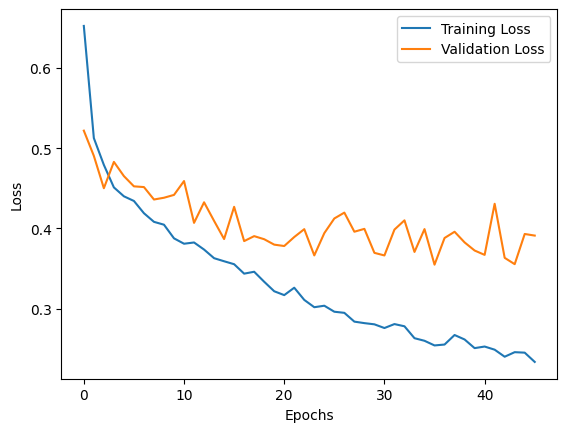

In [317]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [335]:
y_pred = (model_tunned.predict(X_test) > 0.5).astype(int).flatten()
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[844 128]
 [ 35  15]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       972
           1       0.10      0.30      0.16        50

    accuracy                           0.84      1022
   macro avg       0.53      0.58      0.53      1022
weighted avg       0.92      0.84      0.87      1022



### **Recurent Neural Network(RNN)**

In [287]:
from keras.layers import Dense, SimpleRNN, Embedding, LSTM
from keras.preprocessing.sequence import pad_sequences

In [288]:
#Reshape for RNN model
X_train_rnn = X_train.reshape((X_train.shape[0],X_train.shape[1] , 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
#batch_size, input_dim, timesteps

### **Before hyperparameters tuning**

In [341]:
model_rnn_simple = Sequential()

model_rnn_simple.add(LSTM(units=64, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True))

model_rnn_simple.add(LSTM(units=32, activation='relu', return_sequences=True))

model_rnn_simple.add(LSTM(units=64, activation='relu'))

model_rnn_simple.add(Dense(1, activation='sigmoid'))

In [342]:
model_rnn_simple.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_rnn_simple.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 10, 64)            16896     
                                                                 
 lstm_37 (LSTM)              (None, 10, 32)            12416     
                                                                 
 lstm_38 (LSTM)              (None, 64)                24832     
                                                                 
 dense_102 (Dense)           (None, 1)                 65        
                                                                 
Total params: 54209 (211.75 KB)
Trainable params: 54209 (211.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [343]:
history = model_rnn_simple.fit(X_train_rnn, y_train, epochs=30, batch_size=32, validation_data=(X_test_rnn, y_test))

Epoch 1/30
244/244 [==============================] - 12s 22ms/step - loss: 0.5633 - accuracy: 0.7148 - val_loss: 0.5095 - val_accuracy: 0.6350
Epoch 2/30
244/244 [==============================] - 6s 26ms/step - loss: 0.5098 - accuracy: 0.7453 - val_loss: 0.4471 - val_accuracy: 0.7055
Epoch 3/30
244/244 [==============================] - 5s 20ms/step - loss: 0.4763 - accuracy: 0.7789 - val_loss: 0.4438 - val_accuracy: 0.6996
Epoch 4/30
244/244 [==============================] - 5s 20ms/step - loss: 0.4687 - accuracy: 0.7804 - val_loss: 0.4468 - val_accuracy: 0.6986
Epoch 5/30
244/244 [==============================] - 6s 25ms/step - loss: 0.4642 - accuracy: 0.7846 - val_loss: 0.3874 - val_accuracy: 0.7524
Epoch 6/30
244/244 [==============================] - 5s 20ms/step - loss: 0.4547 - accuracy: 0.7877 - val_loss: 0.4046 - val_accuracy: 0.7427
Epoch 7/30
244/244 [==============================] - 6s 24ms/step - loss: 0.4538 - accuracy: 0.7907 - val_loss: 0.4702 - val_accuracy: 0.722

In [344]:
test_loss, test_acc = model_rnn_simple.evaluate(X_test_rnn, y_test)
print(f'Test Accuracy: {test_acc}')
print(f'Test Loss: {test_loss}')

32/32 [==============================] - 0s 11ms/step - loss: 0.5128 - accuracy: 0.7368
Test Accuracy: 0.7367905974388123
Test Loss: 0.5127699375152588


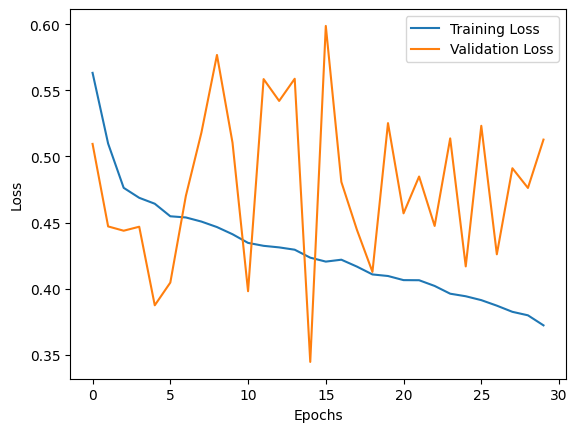

In [345]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [336]:
y_pred = (model_rnn_simple.predict(X_test) > 0.5).astype(int).flatten()
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 2s 16ms/step
[[729 243]
 [ 21  29]]
              precision    recall  f1-score   support

           0       0.97      0.75      0.85       972
           1       0.11      0.58      0.18        50

    accuracy                           0.74      1022
   macro avg       0.54      0.67      0.51      1022
weighted avg       0.93      0.74      0.81      1022



### **Hyperparameter tuned RNN model**

In [346]:
model_rnn = Sequential()

model_rnn.add(LSTM(units=64, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True))
model_rnn.add(BatchNormalization())
model_rnn.add(Dropout(0.2))

model_rnn.add(LSTM(units=64, activation='relu', return_sequences=True))
model_rnn.add(BatchNormalization())
model_rnn.add(Dropout(0.5))

model_rnn.add(LSTM(units=32, activation='relu'))
model_rnn.add(BatchNormalization())
model_rnn.add(Dropout(0.5))

model_rnn.add(Dense(1, activation='sigmoid'))

In [347]:
optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001)
model_rnn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model_rnn.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_39 (LSTM)              (None, 10, 64)            16896     
                                                                 
 batch_normalization_59 (Ba  (None, 10, 64)            256       
 tchNormalization)                                               
                                                                 
 dropout_72 (Dropout)        (None, 10, 64)            0         
                                                                 
 lstm_40 (LSTM)              (None, 10, 64)            33024     
                                                                 
 batch_normalization_60 (Ba  (None, 10, 64)            256       
 tchNormalization)                                               
                                                                 
 dropout_73 (Dropout)        (None, 10, 64)          

In [348]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [349]:
history = model_rnn.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_rnn, y_test), callbacks=[early_stopping])

Epoch 1/50
244/244 [==============================] - 13s 33ms/step - loss: 0.6120 - accuracy: 0.7173 - val_loss: 1.0606 - val_accuracy: 0.0489
Epoch 2/50
244/244 [==============================] - 6s 24ms/step - loss: 0.5559 - accuracy: 0.7425 - val_loss: 1.1176 - val_accuracy: 0.2202
Epoch 3/50
244/244 [==============================] - 7s 30ms/step - loss: 0.5151 - accuracy: 0.7619 - val_loss: 0.6571 - val_accuracy: 0.6086
Epoch 4/50
244/244 [==============================] - 6s 24ms/step - loss: 0.4960 - accuracy: 0.7724 - val_loss: 0.5035 - val_accuracy: 0.6957
Epoch 5/50
244/244 [==============================] - 7s 29ms/step - loss: 0.4926 - accuracy: 0.7709 - val_loss: 0.4862 - val_accuracy: 0.6663
Epoch 6/50
244/244 [==============================] - 6s 24ms/step - loss: 0.4729 - accuracy: 0.7800 - val_loss: 0.6123 - val_accuracy: 0.6566
Epoch 7/50
244/244 [==============================] - 7s 30ms/step - loss: 0.4634 - accuracy: 0.7834 - val_loss: 0.4398 - val_accuracy: 0.727

In [350]:
test_loss, test_acc = model_rnn.evaluate(X_test_rnn, y_test)
print(f'Test Accuracy: {test_acc}')
print(f'Test Loss: {test_loss}')

32/32 [==============================] - 0s 9ms/step - loss: 0.2544 - accuracy: 0.8973
Test Accuracy: 0.8972602486610413
Test Loss: 0.25439244508743286


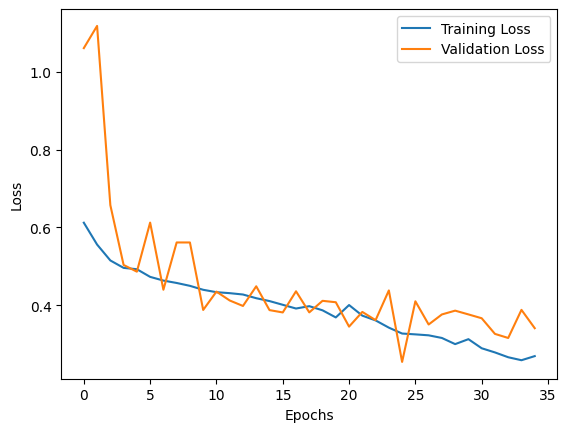

In [351]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()